In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
from PhD_Luminosity_function_final import *
from evfit import *

In [2]:
hdul = fits.open('TilingCatv46.fits')
data = hdul[1].data
t=Table(data)
df = t.to_pandas()

hdul = fits.open('ApMatchedCatv06.fits')
data = hdul[1].data
t=Table(data)
df2 = t.to_pandas()

hdul = fits.open('GalacticExtinctionv03.fits')
data = hdul[1].data
t=Table(data)
df3 = t.to_pandas()

In [3]:
df = pd.merge(df, df2[['CATAID', 'FLUX_AUTO_u', 'FLUX_AUTO_g', 'FLUX_AUTO_r', 'FLUX_AUTO_i', 'FLUX_AUTO_z', 'FLUXERR_AUTO_u', 'FLUXERR_AUTO_g', 'FLUXERR_AUTO_r', 'FLUXERR_AUTO_i', 'FLUXERR_AUTO_z']], on='CATAID', how='left')
df = pd.merge(df, df3[['CATAID', 'A_u', 'A_g', 'A_r', 'A_i', 'A_z']], on='CATAID', how='left')

In [4]:
df = df[(df['SURVEY_CLASS']>=4) & (df['NQ']>=3) & (df['Z']>0.002) & (df['Z']<0.65)]

In [5]:
df

,CATAID,OBJID,RA,DEC,FIBERMAG_R,R_PETRO,U_MODEL,G_MODEL,R_MODEL,I_MODEL,...,FLUXERR_AUTO_u,FLUXERR_AUTO_g,FLUXERR_AUTO_r,FLUXERR_AUTO_i,FLUXERR_AUTO_z,A_u,A_g,A_r,A_i,A_z
0,585589,588848899914203328,183.480648,-0.158225,19.985600,19.453074,21.894562,20.529739,19.453663,18.945805,...,1001.997375,396.183228,571.196167,836.600464,3538.723877,0.10653,0.07839,0.05685,0.04311,0.03057
1,585591,588848899914203338,183.497895,-0.167664,18.726801,17.603594,19.758217,18.387272,17.655390,17.203344,...,1665.806030,658.648804,949.605347,1390.836060,5883.076660,0.10599,0.07799,0.05656,0.04289,0.03041
3,585592,588848899914203383,183.462863,-0.084334,19.729465,18.439117,21.375816,19.530548,18.330122,17.764397,...,2227.112549,880.585815,1269.582520,1859.489502,7865.426758,0.10210,0.07512,0.05448,0.04131,0.02929
4,585597,588848899914203421,183.459417,-0.147435,20.720388,19.627613,21.248838,20.511686,19.509012,19.120184,...,1375.334229,543.798157,784.019714,1148.311646,4857.226562,0.10692,0.07867,0.05706,0.04327,0.03068
6,585600,588848899914203456,183.428237,-0.024423,20.539886,19.335196,20.904034,19.648397,19.229986,18.944212,...,1532.641235,605.996338,873.693787,1279.652466,5412.783203,0.09778,0.07195,0.05218,0.03957,0.02805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221366,585568,588848899914137824,183.355331,-0.161464,19.925093,18.819307,20.849813,19.561117,18.809334,18.452356,...,1626.932983,643.278687,927.445496,1358.379761,5745.790039,0.10920,0.08035,0.05827,0.04419,0.03133
221368,585576,588848899914137896,183.346806,-0.172458,20.530943,19.687235,21.441959,20.567142,19.603834,19.201668,...,1273.463623,503.519196,725.947571,1063.256592,4497.453125,0.10918,0.08034,0.05827,0.04418,0.03133
221369,585577,588848899914137903,183.389071,-0.029114,20.450537,19.387207,20.815376,19.913673,19.304747,19.085520,...,1389.600464,549.438965,792.152283,1160.223022,4907.610352,0.09752,0.07176,0.05204,0.03946,0.02798
221370,585574,588848899914137839,183.415321,-0.207848,19.690861,18.615723,22.564413,20.321875,18.613150,18.036314,...,1893.420654,748.646179,1079.358765,1580.879028,6686.936523,0.11200,0.08241,0.05977,0.04532,0.03213


In [6]:
df['FLUX_AUTO_u'] = df['FLUX_AUTO_u'] * 10**(0.4 * df['A_u'])
df['FLUX_AUTO_g'] = df['FLUX_AUTO_g'] * 10**(0.4 * df['A_g'])
df['FLUX_AUTO_r'] = df['FLUX_AUTO_r'] * 10**(0.4 * df['A_r'])
df['FLUX_AUTO_i'] = df['FLUX_AUTO_i'] * 10**(0.4 * df['A_i'])
df['FLUX_AUTO_z'] = df['FLUX_AUTO_z'] * 10**(0.4 * df['A_z'])

In [7]:
df = add_column(df, column_name='Z_TONRY')

('lambda', 'vacuum_pass', 'pass_1_0', 'pass', 'pass_1_6', 'pass_1_9')
('lambda', 'vacuum_pass', 'pass_1_0', 'pass', 'pass_1_6', 'pass_1_9')
('lambda', 'vacuum_pass', 'pass_1_0', 'pass', 'pass_1_6', 'pass_1_9')
('lambda', 'vacuum_pass', 'pass_1_0', 'pass', 'pass_1_6', 'pass_1_9')
('lambda', 'vacuum_pass', 'pass_1_0', 'pass', 'pass_1_6', 'pass_1_9')


C:\Users\adrie\anaconda3\lib\site-packages\kcorrect\template.py:221: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)


Fixed  6269 missing fluxes
Replacing 329 bad fits with mean


C:\Users\adrie\kcorr_final.py:65: RuntimeWarning: divide by zero encountered in power
  plt.errorbar(range(len(fnames)), flux_mean, yerr=ivar_mean**-0.5, color=color)


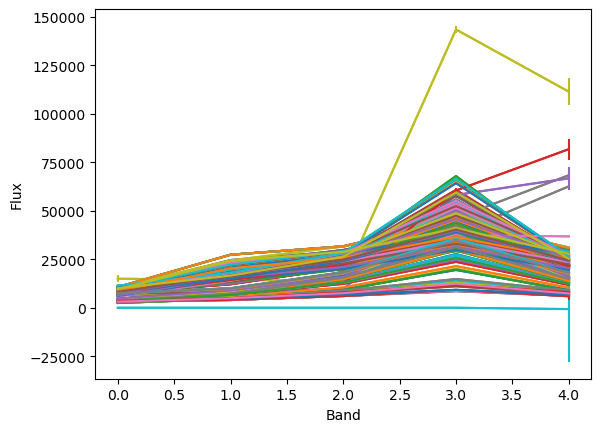

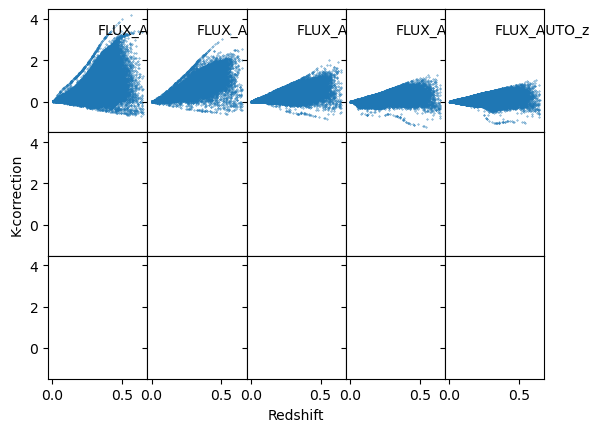

C:\Users\adrie\kcorr_final.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Kcorrection'] = k.tolist()
C:\Users\adrie\kcorr_final.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['r_Kcorrection'] = [x[index] for x in k]
C:\Users\adrie\kcorr_final.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

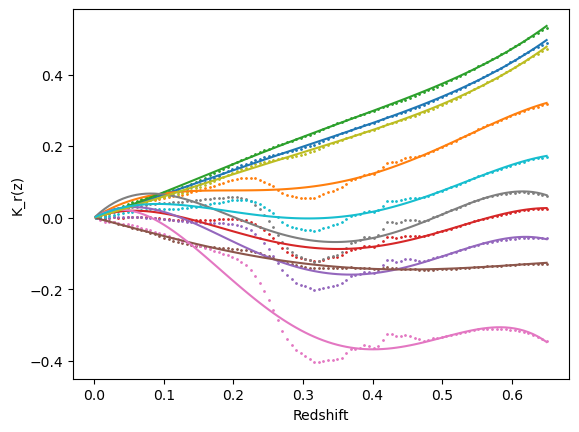

In [8]:
df = kcorrection(df, responses = ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0'], fnames = ['FLUX_AUTO_u', 'FLUX_AUTO_g', 'FLUX_AUTO_r', 'FLUX_AUTO_i', 'FLUX_AUTO_z'], ferrnames = ['FLUXERR_AUTO_u', 'FLUXERR_AUTO_g', 'FLUXERR_AUTO_r', 'FLUXERR_AUTO_i', 'FLUXERR_AUTO_z'], rband = 'FLUX_AUTO_r', zband = 'FLUX_AUTO_z', redshift = 'Z_TONRY', survey='GAMAII')

In [9]:
df = luminosity_distance(df, redshift='Z_TONRY')

In [10]:
df = magnitude(df, bands = ['u', 'g', 'r', 'i', 'z'], fluxbands = ['FLUX_AUTO_u', 'FLUX_AUTO_g', 'FLUX_AUTO_r', 'FLUX_AUTO_i', 'FLUX_AUTO_z'], lumdist = 'Lum_Distance', kcorrection = 'Kcorrection')

C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\adrie\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
df

,CATAID,OBJID,RA,DEC,FIBERMAG_R,R_PETRO,U_MODEL,G_MODEL,R_MODEL,I_MODEL,...,m_u,M_u,m_g,M_g,m_r,M_r,m_i,M_i,m_z,M_z
0,585589,588848899914203328,183.480648,-0.158225,19.985600,19.453074,21.894562,20.529739,19.453663,18.945805,...,0.478817,-38.867192,-0.560277,-40.134791,-1.662123,-40.900177,-2.138384,-41.272127,-2.477037,-41.590810
1,585591,588848899914203338,183.497895,-0.167664,18.726801,17.603594,19.758217,18.387272,17.655390,17.203344,...,-1.376571,-39.832440,-2.780235,-41.112936,-3.491060,-41.735361,-3.917956,-41.977850,-4.100285,-42.236680
2,585592,588848899914203383,183.462863,-0.084334,19.729465,18.439117,21.375816,19.530548,18.330122,17.764397,...,-0.088401,-39.455060,-1.650539,-41.134383,-2.711692,-41.896234,-3.172716,-42.266456,-3.652963,-42.717228
3,585597,588848899914203421,183.459417,-0.147435,20.720388,19.627613,21.248838,20.511686,19.509012,19.120184,...,0.061398,-41.434486,-0.473478,-42.474395,-1.512875,-42.930083,-1.916288,-43.085315,-1.957344,-43.049596
4,585600,588848899914203456,183.428237,-0.024423,20.539886,19.335196,20.904034,19.648397,19.229986,18.944212,...,-0.023162,-38.329171,-1.405829,-39.583177,-1.802460,-39.954969,-2.147006,-40.025110,-2.299559,-40.326975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182332,585568,588848899914137824,183.355331,-0.161464,19.925093,18.819307,20.849813,19.561117,18.809334,18.452356,...,-0.170929,-38.610526,-1.538210,-39.927767,-2.344215,-40.561485,-2.725067,-40.817445,-2.910063,-41.014645
182333,585576,588848899914137896,183.346806,-0.172458,20.530943,19.687235,21.441959,20.567142,19.603834,19.201668,...,0.175516,-40.493077,-0.455349,-41.552862,-1.443197,-42.108698,-1.916985,-42.464500,-2.069727,-42.548680
182334,585577,588848899914137903,183.389071,-0.029114,20.450537,19.387207,20.815376,19.913673,19.304747,19.085520,...,0.059027,-39.393250,-1.064954,-40.587331,-1.733607,-41.013187,-1.960960,-41.138156,-2.278942,-41.436155
182335,585574,588848899914137839,183.415321,-0.207848,19.690861,18.615723,22.564413,20.321875,18.613150,18.036314,...,NaN,NaN,-0.807920,-42.501130,-2.461674,-43.262258,-3.024323,-43.611209,-3.364251,-43.875379


In [12]:
df.to_pickle('dataframe_GAMAII.pkl')

In [13]:
df_sample = sample(df, 30000)

In [14]:
# import pandas as pd
# df = pd.read_pickle('dataframe_GAMAII.pkl')
# from evfit import *

C:\Users\adrie\anaconda3\lib\site-packages\kcorrect\template.py:221: RuntimeWarning: underflow encountered in divide
  self.flux = self.restframe_flux / (1. + redshift)



************************
jswml.py version  1.1
survey :  GAMAII
mlims :  (0, 19.8)
redshift range : [ 0.002 ;  0.65 ]
area :  180
method :  post
Kcorrect responses :  ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0']
{}
CosmoLookup: H0=100.0, Omega_l=0.7, P=1
H0, omega_l, z0, area/Sr =  100.0 0.7 0 0.05483113556160754
30000 galaxies selected
Setting LF bin limits Qmin, Qmax =  0.0 1.5
LF bins at Qmin:  [   6    7   31   92  191  372  729 1137 1623 2142 2444 2682 2817 2686
 2349 1922 1772 1423 1208  959  764  619  458  348  242  214  179  101
   99   85   68   42   33   33   37   26   19   13    5    3]
LF bins at Qmax:  [   1    0    3    2   15   51  137  362  682 1244 1909 2507 2878 3127
 3169 2765 2268 1934 1510 1256  988  798  568  437  307  244  195  129
  106   93   75   47   35   34   35   29   18   17    4    4]
[False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  T

  0%|          | 0/30 [00:00<?, ?it/s]

C:\Users\adrie\evfit.py:1076: RuntimeWarning: invalid value encountered in divide
  err = phi/hist**0.5


Simplex optimization ...
Optimization terminated successfully.
         Current function value: 239.597354
         Iterations: 3
         Function evaluations: 7


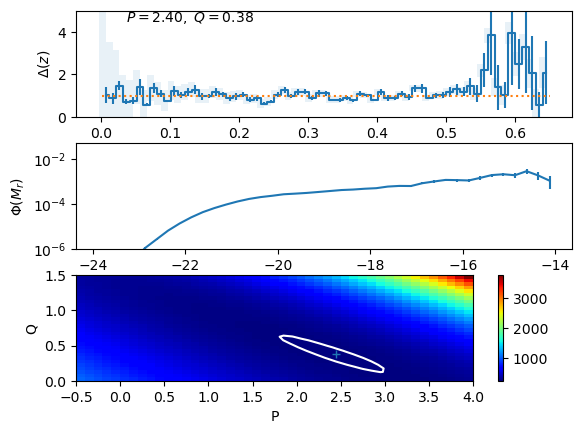

In [15]:
ev_fit(infile=df_sample, outfile='evfit_post_GAMAII.fits', Mmin=-24, Mmax=-14, Mbin=40, method='post')


************************
jswml.py version  1.1
survey :  GAMAII
mlims :  (0, 19.8)
redshift range : [ 0.002 ;  0.65 ]
area :  180
method :  lfchi
Kcorrect responses :  ['sdss_u0', 'sdss_g0', 'sdss_r0', 'sdss_i0', 'sdss_z0']
{}
CosmoLookup: H0=100.0, Omega_l=0.7, P=1
H0, omega_l, z0, area/Sr =  100.0 0.7 0 0.05483113556160754
30000 galaxies selected
Setting LF bin limits Qmin, Qmax =  0.0 1.5
zlo, zhi, Mmin, Mmax, nbins
0.002 0.2013846153846154 -39.455593101086414 -9.094345828915191 32
LF bins at Qmin:  [   0    0    0    1    2    6   39   56  127  225  349  505  657  837
 1018 1121 1296 1298 1206  959  764  619  458  348  242  214  179  101
   99   85   68   42   33   33   37   26   19   13    5    3]
0.2013846153846154 0.65 -43.536645720335116 -19.655593101086414 15
LF bins at Qmin:  [   6    7   31   91  189  366  690 1081 1496 1917 2095 2177 2160 1849
 1331  801  476  125    2    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0

  0%|          | 0/30 [00:00<?, ?it/s]

Simplex optimization ...
Optimization terminated successfully.
         Current function value: 222.300510
         Iterations: 4
         Function evaluations: 9


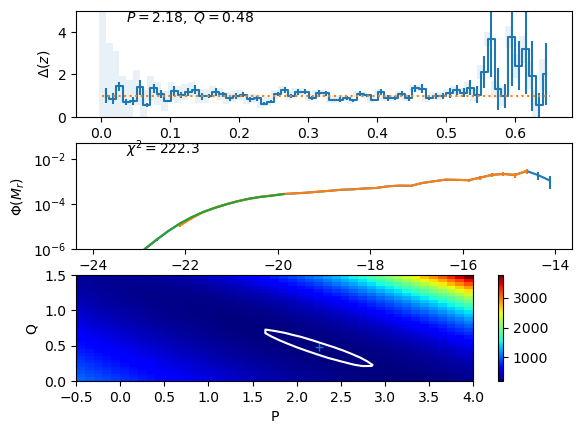

In [16]:
ev_fit(infile=df_sample, outfile='evfit_lfchi_GAMAII.fits', Mmin=-24, Mmax=-14, Mbin=40, method='lfchi')